# KAGGLE TITANIC CHALLENGE 

In [1]:
#importing python library file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df_test = pd.read_csv('test.csv')    #reading the test data file
df_train = pd.read_csv('train.csv')  #reading the train data file

In [3]:
df_train.shape,df_test.shape        #to know the number of rows and columns in data set.

((891, 12), (418, 11))

In [4]:
df_train.head(10)                #to know the data from the training data. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_test.head(10)                           #to know the data from the testing data. 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
#Analysis found that survival coulmn is not their in training data set. 

In [7]:
df_test.info()  #to check the data type and null values present in the test data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_train.info()    #to check the data type and null values present in the train data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.describe()     #description of the train data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()   #description of the test data

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# DATA VISUALIZATION 

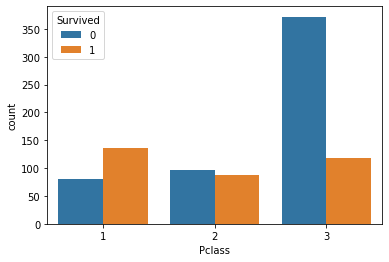

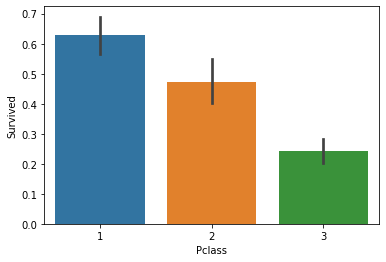

In [11]:
sns.countplot(x="Pclass",data=df_train,hue='Survived') #countplot with the passengerclass and survived 
plt.show()
sns.barplot(x="Pclass",y='Survived',data=df_train)
plt.show()

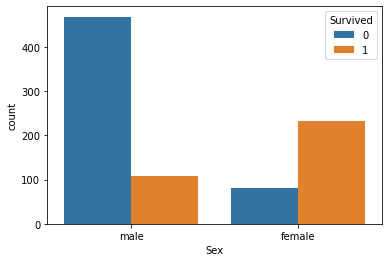

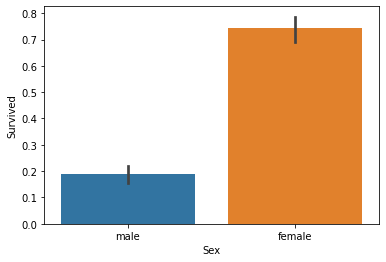

In [12]:
sns.countplot(x="Sex",data=df_train,hue='Survived') #countplot with the sex and survived 
plt.show()
sns.barplot(x="Sex",y='Survived',data=df_train)
plt.show()

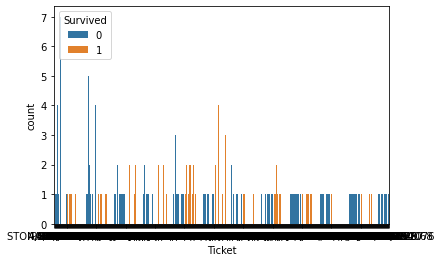

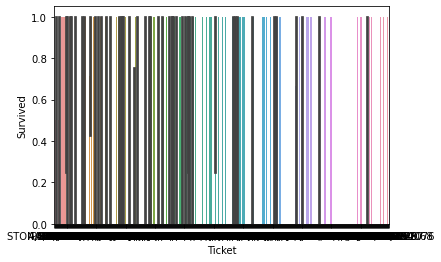

In [13]:
sns.countplot(x="Ticket",data=df_train,hue='Survived')  #counter plot for the survival with ticket 
plt.show()
sns.barplot(x="Ticket",y='Survived',data=df_train)
plt.show()

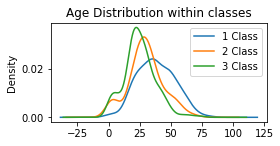

In [14]:
#Age distribution of kernel density graph with passenger class
ax2 = plt.subplot2grid((2, 3), (1, 0), colspan=2)
df_train[df_train.Pclass == 1]['Age'].plot(kind = 'kde')
df_train[df_train.Pclass == 2]['Age'].plot(kind = 'kde')
df_train[df_train.Pclass == 3]['Age'].plot(kind = 'kde')
plt.title("Age Distribution within classes")
plt.legend(['1 Class', '2 Class', '3 Class'])

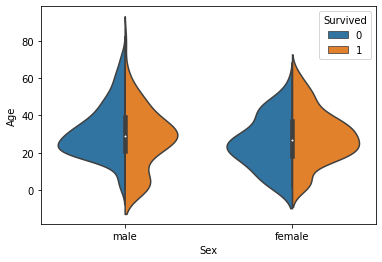

In [15]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, split=True)   #violin plot for the survival with Age and sex.

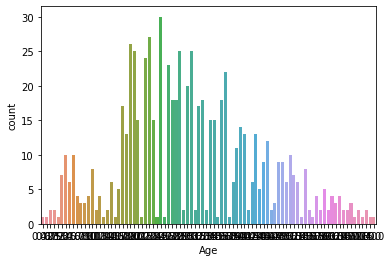

In [16]:
#countplot for age
sns.countplot(df_train['Age'])

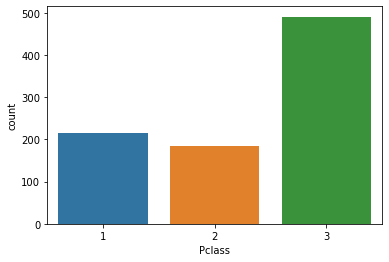

In [17]:
sns.countplot(df_train['Pclass'])      #countplot for passenger class

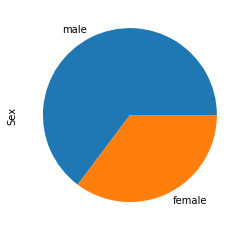

In [18]:
df_train['Sex'].value_counts(sort=True).plot.pie() #pie chart with the sex 
plt.show()

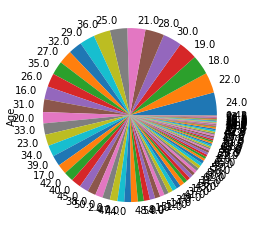

In [19]:
df_train['Age'].value_counts(sort=True).plot.pie()  #pie chart with the age
plt.show()

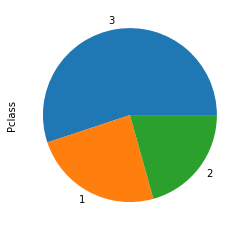

In [20]:
df_train['Pclass'].value_counts(sort=True).plot.pie() #pie chart of the passenger class
plt.show()

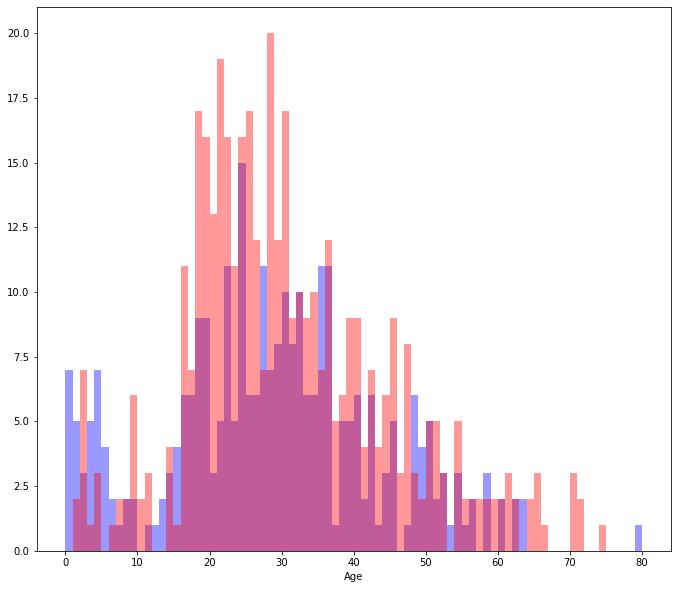

In [21]:
#plot for age with sex.
total_survived = df_train[df_train['Survived']==1]
total_not_survived = df_train[df_train['Survived']==0]
male_survived = df_train[(df_train['Survived']==1) & (df_train['Sex']=="male")]
female_survived = df_train[(df_train['Survived']==1) & (df_train['Sex']=="female")]
male_not_survived = df_train[(df_train['Survived']==0) & (df_train['Sex']=="male")]
female_not_survived = df_train[(df_train['Survived']==0) & (df_train['Sex']=="female")]

plt.figure(figsize=[25,10])
plt.subplot(122)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')


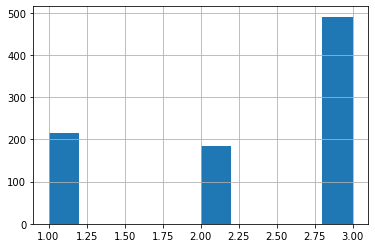

In [22]:
#histogram plot for passenger class.
df_train['Pclass'].hist()

# DATA WRANGLING OR CLEANING 

In [23]:
import pandas as pd #import the pandas function 

In [24]:
df_test = pd.read_csv('test.csv')    #reading the test data file
df_train = pd.read_csv('train.csv')  #reading the train data file

In [25]:
df_test.head()  #to know the test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df_train.head() #to know the train data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_test.shape, df_train.shape  #shape of  the train and test data 

((418, 11), (891, 12))

In [28]:
Y = df_train["Survived"]
X = df_train

In [29]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
#X = X.drop("PassengerId", 1)
X = X.drop("Name", 1)   #droping the name coulmn

In [31]:
genders = ["male", "female"]      #converting string values into intger value 
for i in range(len(X["Sex"])):
    X["Sex"][i] = genders.index(X["Sex"][i])

<ipython-input-31-70801ee2b06a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][i] = genders.index(X["Sex"][i])


In [32]:
X.isna().sum()   #counting the null value 

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

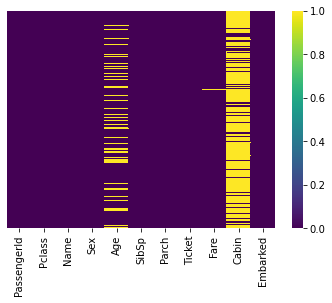

In [111]:
sns.heatmap(df_test.isnull(), yticklabels=False, cmap="viridis")  #heatmap graph for test data and in cabin,age many missing values.

In [33]:
total_age = 0               #calucating the average age value 
count_of_valid_age_people = 0
for i in range(len(X["Age"])):
    age = float(X["Age"][i])
    if str(float(age))!="nan":
        count_of_valid_age_people += 1
        total_age += age
average = total_age / count_of_valid_age_people

In [34]:
average

29.69911764705882

In [35]:
for i in range(len(X["Age"])):             #converting or adding the dummy value for nan value with the average.  
    age = float(X["Age"][i])
    if str(float(age))=="nan":
        X["Age"][i] = average

<ipython-input-35-84b8db6a7ef2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"][i] = average


In [36]:
X  #display the table

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,0,26.000000,0,0,111369,30.0000,C148,C


In [37]:
X.isna().sum()  #show the  sum of the null value 

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
X = X.drop("Cabin", 1) #drop the cabin column 

In [39]:
unique_embarked = list(set(X["Embarked"])) #checking with the unique value of the embarked 

In [40]:
unique_embarked  #displays the unique value of embarked 

['Q', nan, 'S', 'C']

In [41]:
for i in range(len(X["Embarked"])):     #adding dummie values to the nan value in embarked column
    X["Embarked"][i] = unique_embarked.index(X["Embarked"][i])

<ipython-input-41-e260adebe1d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][i] = unique_embarked.index(X["Embarked"][i])


In [42]:
X  #displaying the dummies values of embarked column

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,3
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,1,35.000000,1,0,113803,53.1000,2
4,5,0,3,0,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,211536,13.0000,2
887,888,1,1,1,19.000000,0,0,112053,30.0000,2
888,889,0,3,1,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,0,26.000000,0,0,111369,30.0000,3


In [43]:
X = X.drop("Ticket", 1)  #dropping the ticket column

In [81]:
X

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,2
1,2,1,1,1,38.000000,1,0,71.2833,3
2,3,1,3,1,26.000000,0,0,7.9250,2
3,4,1,1,1,35.000000,1,0,53.1000,2
4,5,0,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,2
887,888,1,1,1,19.000000,0,0,30.0000,2
888,889,0,3,1,29.699118,1,2,23.4500,2
889,890,1,1,0,26.000000,0,0,30.0000,3


In [82]:
X = X.drop("Parch", 1)   #dropping the Parent child column 

In [83]:
X

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,0,22.000000,1,7.2500,2
1,2,1,1,1,38.000000,1,71.2833,3
2,3,1,3,1,26.000000,0,7.9250,2
3,4,1,1,1,35.000000,1,53.1000,2
4,5,0,3,0,35.000000,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,13.0000,2
887,888,1,1,1,19.000000,0,30.0000,2
888,889,0,3,1,29.699118,1,23.4500,2
889,890,1,1,0,26.000000,0,30.0000,3


# PREDICTION OF THE MODEL 

In [84]:
#importing model function 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import *
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

## BERNOULLI NAVIE BAYES MODEL

In [85]:
 model = BernoulliNB(binarize=True)     #model function is called 

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.13, random_state=42) #train and test data is split 

In [87]:
x_test.shape    #knowing the value of test and train 

(116, 8)

In [88]:
model.fit(x_train, y_train)       #fitting the model
result = model.predict(x_test)

In [89]:
score = accuracy_score(y_test,result)   #finding the score 

In [90]:
score

0.7068965517241379

# MULTINOMIAL NAVIE BAYES 

In [91]:
model = MultinomialNB()    #model function is called 

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.13, random_state=42)  #train and test data is split 

In [93]:
model.fit(x_train, y_train)      
result = model.predict(x_test)   #fitting the model

In [94]:
score = accuracy_score(y_test,result)  #finding the score 

In [95]:
score

0.7155172413793104

# GAUSSIAN NAVIE BAYES 

In [96]:
model = GaussianNB()    #model function is called 

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.13, random_state=42)  #train and test data is split 

In [98]:
model.fit(x_train, y_train)      #fitting the model
result = model.predict(x_test)

In [99]:
score = accuracy_score(y_test,result)  #finding the score 
#score

In [112]:
score

1.0

# RANDOM FOREST CLASSIFIER 

In [101]:
model = RandomForestClassifier()  #model function is called 

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.13, random_state=42)  #train and test data is split

In [103]:
model.fit(x_train, y_train)
result = model.predict(x_test)   #fitting the model

In [104]:
score = accuracy_score(y_test,result)   #finding the score 
score

1.0

# MLP CLASSIFIER 

In [105]:
model = MLPClassifier()  #model function is called 

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.13, random_state=42)  #train and test data is split

In [107]:
model.fit(x_train, y_train)
result = model.predict(x_test)  #fitting the model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [109]:
score = accuracy_score(y_test,result)  #finding the score 
score

1.0